In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Use pandas to get some insights into the data

In [6]:
df = pd.read_csv(r"D:\Data Science\MACHINE LEARNING\Assignment\Assignment-1 Nearest Neighbours & KMeans\Datahouse_rental_data.csv")
df.head(30)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
5,6,1127.886,11,12,4,2,2,148000
6,7,1352.040,5,7,3,2,1,58000
7,8,757.854,5,14,1,0,1,48000
8,9,1152.792,10,12,3,2,2,45000
9,10,1423.200,4,5,4,2,2,65000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [24]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [16]:
df.isnull().sum() # there is no null value in this data

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [17]:
df.dtypes  # checking data types, all columns have number format, no need to change data type format

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True) # dropped Un named column

In [9]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [18]:
df['Price'].unique() # checking unique values in price column

array([ 62000,  78000,  58000,  45000, 148000,  48000,  65000,  31000,
        29002,  39000,  55000, 100000,  25000,  90000,  33000, 140000,
       105000, 200000,  98000, 145000,  24028,  85000,  57000,  46000,
        52000,  43500,  60000,  36000,  70000,  50000,  47999,  80000,
        24030,  76000,  32500,  30032, 180000,  29032,  43000,  30000,
        32000,  49000,  27500,  23000,  33500,  26000,  41000,  38000,
        75000,  56000,  40000,  89900,  37000,  48800, 130000,  49800,
        79999,  66000,  95000, 150000,  99999,  92000, 149999,  35000,
        22000,  53000,  68000, 120000,  27000,  89000,  86888,  58888,
        41888,  29999,  88000, 225000,  40999,  97999,  77000,  44999,
        59888,  28000,  82000,  33700,  42000,  67000,  29500,  65999,
        23800,  49999, 110000,  41999, 160000, 138888,  99990,  34800,
        63000,  77999,  17000, 250000,  51999, 206000,  39999,  74999,
        59500,  73000, 170000,  38888,  24888,  31999,  61000,  19000,
      

In [19]:
df['Price'].unique().sum() # number of unique values in price column

10339149

In [15]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [20]:
df['Floor'].unique() # checking unique values in floor column

array([ 2,  5, 11, 10,  4,  9,  6,  3, 19,  7, 21,  8,  1, 12, 13, 18, 14,
       16, 15, 22, 17], dtype=int64)

In [21]:
df.shape  # checking shape of the data

(645, 7)

In [22]:
df.size #checking size of the data

4515

<AxesSubplot:xlabel='Floor'>

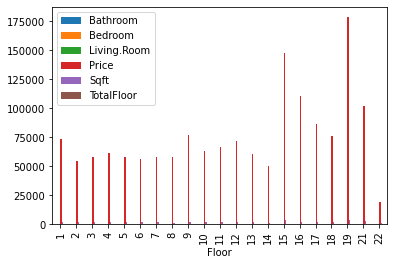

In [29]:
b=pd.pivot_table(df,index=['Floor'])
b.plot(kind='bar')

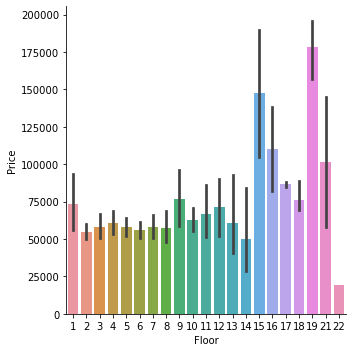

In [32]:
sns.catplot(x='Floor', y='Price',data=df, kind='bar')